In [25]:

#! pip install wordcloud
#
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
import nltk
# Load the library with the CountVectorizer method
#(CountVectorizer=> Convert a collection of text documents to a matrix of token counts)
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/kidist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kidist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kidist/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
tweet  = pd.read_csv("../data/preprocessed_data.csv")

In [6]:
tweet.tail()

,text,date,week-number
179103,thanks nominating wearamask challenge nominate,2020-08-29 19:44:21,5
179104,year insanity lol covid,2020-08-29 19:44:16,5
179105,powerful painting juan lucena tribute grandpar...,2020-08-29 19:44:15,5
179106,student test positive covid major university a...,2020-08-29 19:44:14,5
179107,stop see stop,2020-08-29 19:44:08,5


In [7]:
tweet.head()

,text,date,week-number
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,0
1,hey made sense player pay respect,2020-07-25 12:27:17,0
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,0
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,0
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,0


In [8]:
tweet[tweet.text.isna()].size


1824

In [9]:
tweet = tweet[tweet.text.notna()]


In [10]:
tweet[tweet.text.isna()].size

0

In [11]:
paragraph = "\n".join(tweet.text.values.tolist())

In [12]:
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('frequency_of_the_words')
    plt.show()

/home/kidist/anaconda3/envs/yanis-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


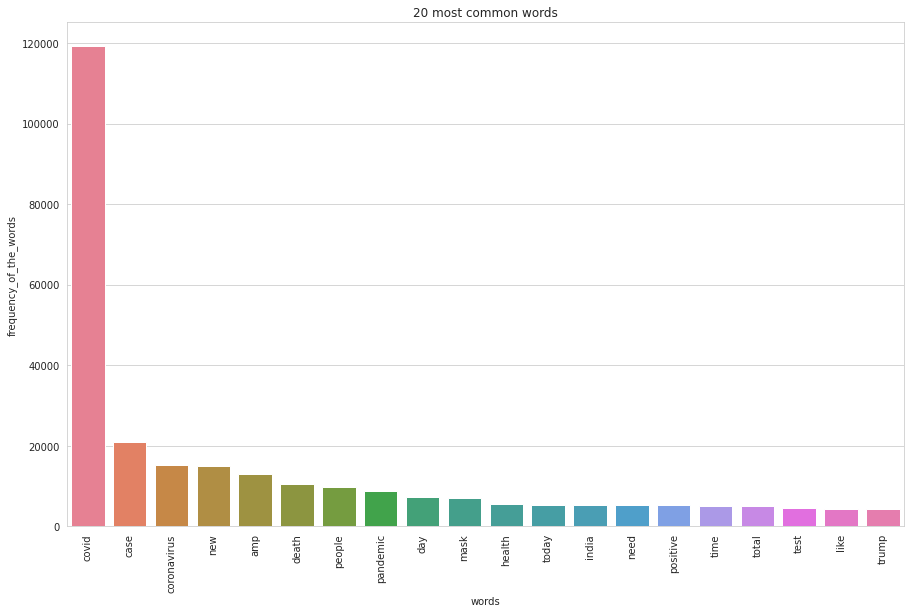

In [13]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')


# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(paragraph.split("\n"))

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


In [14]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=10, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(paragraph)

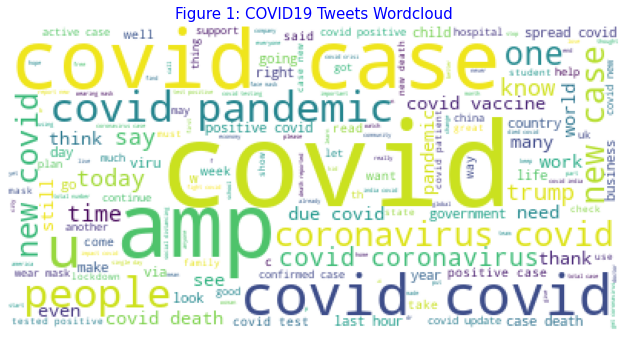

In [15]:
# Visualize the word cloud
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud.to_image())
plt.axis('off')
plt.title('Figure 1: COVID19 Tweets Wordcloud',color="blue" )
 
plt.show()


In [16]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=10, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(paragraph)

In [17]:
week_7 = tweet[tweet["week-number"]== 5]['text']

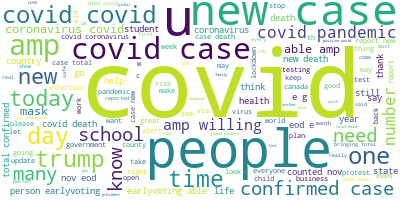

In [18]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate("\n".join(week_7.values.tolist()))
wordcloud.to_image()

In [19]:
tweet["week-number"].unique()

array([0, 1, 2, 3, 4, 6, 5])

In [20]:
len (tweet["week-number"].unique())

7

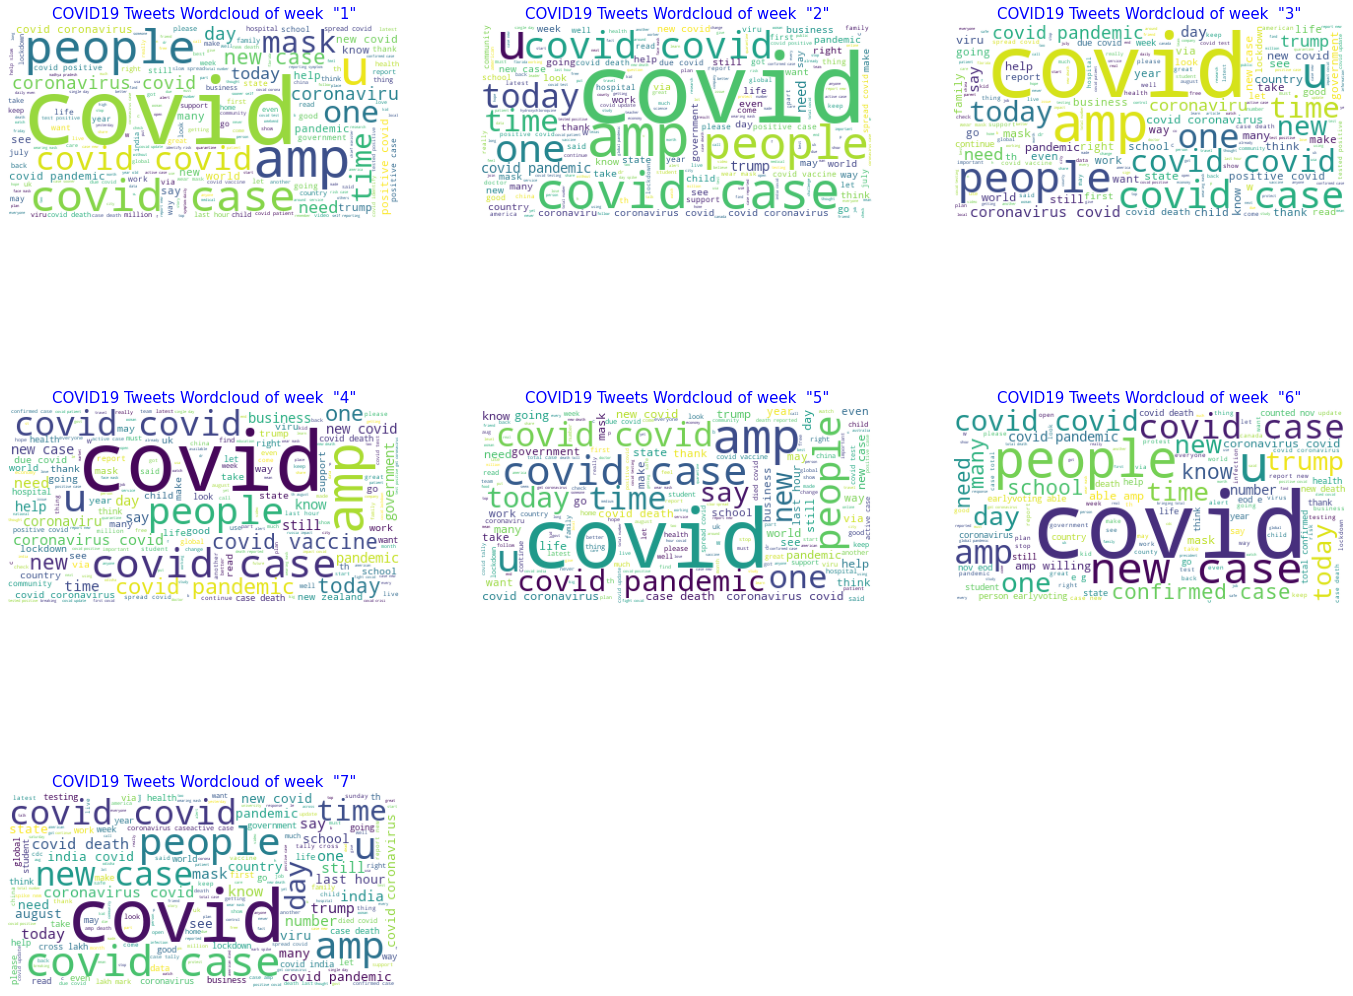

In [21]:
fig , axis= plt.subplots(nrows=3,ncols=3, figsize=(24,20))
for i in tweet["week-number"].unique():
    week = tweet[tweet["week-number"]==i]["text"]
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate("\n".join(week.values.tolist()))

    
    axis[i//3, i%3].imshow(wordcloud.to_image())
    axis[i//3, i%3].axis('off')
    axis[i//3, i%3].set_title('COVID19 Tweets Wordcloud of week  "{}"'.format(i+1),color="blue")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.show()

In [22]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        


In [23]:
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model


In [24]:
for i in tweet["week-number"].unique():
  # Initialise the count vectorizer with the English stop words
  count_vectorizer = CountVectorizer(stop_words='english')
  week_i = tweet[tweet["week-number"]==i]
  # Fit and transform the processed titles
  count_data = count_vectorizer.fit_transform(week_i["text"].tolist())
  lda = LDA(n_components=number_topics, n_jobs=-1)
  lda.fit(count_data)
  # Print the topics found by the LDA model
  print("Week: {} Topics found via LDA:".format(i+1))
  print("=====================================")

  print_topics(lda, count_vectorizer, number_words)

Week: 1 Topics found via LDA:

Topic #0:
covid case new death coronavirus total positive day india july

Topic #1:
covid amp health people year corona time day life mask

Topic #2:
covid help symptom spread risk daily need self reporting case

Topic #3:
covid like make amp test month positive need chief pandemic

Topic #4:
covid coronavirus mask people pandemic amp trump time school lockdown
Week: 2 Topics found via LDA:

Topic #0:
covid trump coronavirus american vaccine pandemic new doctor time corona

Topic #1:
covid mask people like amp want wear coronavirus face make

Topic #2:
covid case new death coronavirus total india day july update

Topic #3:
covid test positive amp pandemic testing tested need result people

Topic #4:
covid amp school health pandemic coronavirus need state kid student
Week: 3 Topics found via LDA:

Topic #0:
covid mask amp people face wear time wearing trump social

Topic #1:
covid amp coronavirus pandemic help vaccine people risk trump like

Topic #2:
covi